In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import netCDF4 as nc
from scipy import spatial as spat

import sys
sys.path.append('../')
from src import data
from src import visualization as vis

import os

In [2]:
def get_spaced_point(coords):
    N = len(coords)
    good_points = np.array(list(range(N)))
    good_points = good_points.astype(float)
    min_spacing = 10000
    for i in range(N):
        if ~np.isnan(good_points[i]):
            #print(i)
            dist = np.sqrt(np.square(coords[:, 0] - coords[i, 0]) + np.square(coords[:, 1] - coords[i, 1]))
            idx = dist < min_spacing
            #print(dist)
            good_points[idx] = np.nan
            good_points[i] = i
            
    good = good_points[~np.isnan(good_points)]
    good = good.astype(int)
            
    return good

In [3]:
def get_datafiles_for_year(year, months):
    directory = "../../../gom3_hourly"
    file_paths = []
    for m in months:
        fname = directory+"/gom3_{}{}.nc".format(year, str(m).zfill(2))
        if os.path.exists(fname):
            file_paths.append(fname)

    return file_paths

def get_temp_for_year(year, months):
    files = get_datafiles_for_year(year, months)
    temps = np.zeros(shape=(1,))
    depths = np.zeros(shape=(1,))
    
    for f in files:
        d = nc.Dataset(f)

        t = d.variables['temp'][0, 0, :].data
        h = d.variables['h'][:].data
        la = d.variables['y'][:].data
        lo = d.variables['x'][:].data
        
        coords = np.hstack((np.array([lo]).transpose(), np.array([la]).transpose()))
        good = get_spaced_point(coords)
        
        temps = np.concatenate((temps, t[good]))
        depths = np.concatenate((depths, h[good]))

        d.close()

    return temps, depths

def get_temp_for_all_years(years, months):

    temps = np.zeros(shape=(1,))
    depths = np.zeros(shape=(1,))

    for y in years:
        t, h = get_temp_for_year(y, months)
        temps = np.concatenate((temps, t))
        depths = np.concatenate((depths, h))

    return temps, depths

In [4]:
t, d = get_temp_for_year(1984, range(2, 9))

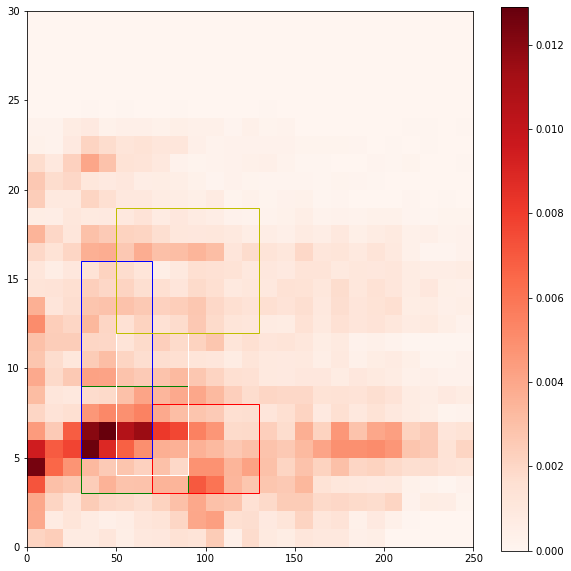

In [6]:
h, xe, ye = np.histogram2d(d, t, range=[[0, 250], [0, 30]], bins=[25, 30])
h=h.T
h /= h.sum()

fig, ax = plt.subplots(1, 1, figsize=(10,10))

cod_rect = mpl.patches.Rectangle((30, 3), 60, 6, linewidth=1,edgecolor='g',facecolor='none')
had_rect = mpl.patches.Rectangle((70, 3), 60, 5, linewidth=1,edgecolor='r',facecolor='none')
flo_rect = mpl.patches.Rectangle((50, 4), 40, 8, linewidth=1,edgecolor='w',facecolor='none')
mac_rect = mpl.patches.Rectangle((30, 5), 40, 11, linewidth=1,edgecolor='b',facecolor='none')
but_rect = mpl.patches.Rectangle((50, 12), 80, 7, linewidth=1,edgecolor='y',facecolor='none')

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], aspect=10, cmap='Reds')

ax.add_patch(cod_rect)
ax.add_patch(had_rect)
ax.add_patch(flo_rect)
ax.add_patch(mac_rect)
ax.add_patch(but_rect)

plt.colorbar(im, ax=ax)

In [26]:
np.sum(h[:, 0])

8.287948234025345

In [47]:
gomfiles_dir = "../../../gom3_hourly"

dates = []
temps = []
cod = []
had = []
flo = []
mac = []
but = []

for y in range(1980, 2017):
    print(y)
    for m in range(1, 13):
        mo = str(m).zfill(2)
        fname = "/gom3_{}{}.nc".format(y, mo)
        dset = nc.Dataset(gomfiles_dir+fname)
        H = dset.variables['h'][:].data
        T = dset.variables['temp'][0, 0, :].data
        
        la = dset.variables['y'][:].data
        lo = dset.variables['x'][:].data
        coords = np.hstack((np.array([lo]).transpose(), np.array([la]).transpose()))
        good = get_spaced_point(coords)
        
        H = H[good]
        T = T[good]
        
        h, xe, ye = np.histogram2d(H, T, range=[[0, 250], [0, 30]], bins=[25, 30])
        h=h.T
        h = h/h.sum()
        
        dates.append(y+(m/12))
        
        s = np.sum(h)
        
        cod.append(np.sum(h[3:9, 3:9])/s)
        had.append(np.sum(h[3:8, 7:13])/s)
        flo.append(np.sum(h[4:12, 5:9])/s)
        mac.append(np.sum(h[5:16, 3:7])/s)
        but.append(np.sum(h[12:19, 5:13])/s)
        
        temps.append(np.mean(T))

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [37]:
cod

[0.28560719640179916,
 0.280859375,
 0.2703144140465496,
 0.30872986137130015,
 0.2923712889891019,
 0.07823775161412838,
 0.026457055214723926,
 0.0119276644863409,
 0.009593246354566386,
 0.018195602729340406,
 0.02504672897196262,
 0.15568862275449102,
 0.27003418154196734,
 0.23483285183656624,
 0.2903709254402398,
 0.3532710280373832,
 0.24567343867569602,
 0.044173648134044174,
 0.005749329244921426,
 0.0030663089306247606,
 0.0,
 0.0,
 0.004485981308411215,
 0.17345794392523364,
 0.295838020247469,
 0.3270849273144606,
 0.29767990562327956,
 0.2965491088357982,
 0.26636225266362257,
 0.0940332326283988,
 0.010467289719626167,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09869158878504675,
 0.192293017932087,
 0.319245283018868,
 0.29820542191676214,
 0.29714500375657404,
 0.23311713086608163,
 0.12243346007604564,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0037383177570093455,
 0.11925233644859813,
 0.2828054298642534,
 0.32376578645235354,
 0.3109594235874099,
 0.3202738683910232,
 0.25018782870022543,
 0.07802

In [48]:
cod = np.mean(np.array(cod).reshape(-1, 12), axis=1)
had = np.mean(np.array(had).reshape(-1, 12), axis=1)
flo = np.mean(np.array(flo).reshape(-1, 12), axis=1)
mac = np.mean(np.array(mac).reshape(-1, 12), axis=1)
but = np.mean(np.array(but).reshape(-1, 12), axis=1)

temps = np.mean(np.array(temps).reshape(-1, 12), axis=1)

In [49]:
dates = list(range(1980, 2017))
dates = np.array(dates)

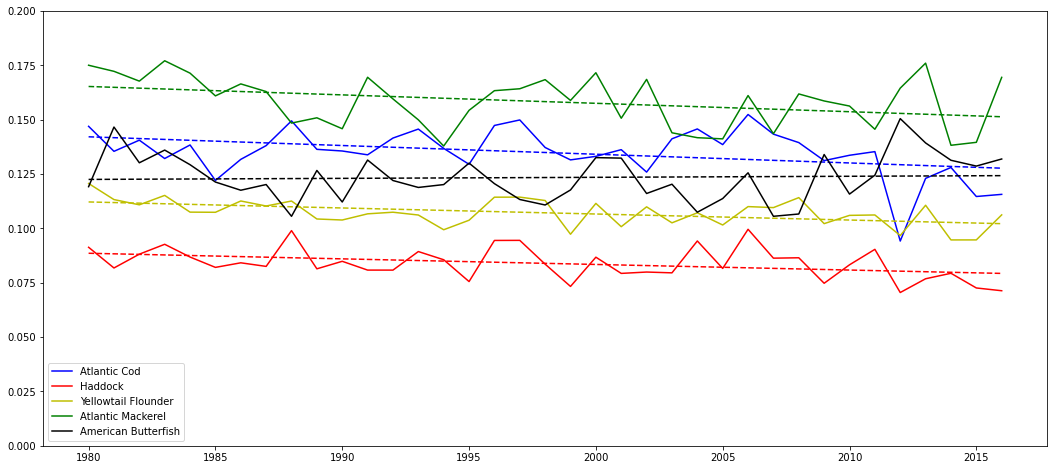

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

ax.plot(dates, cod, "b-", label="Atlantic Cod", )
ax.plot(dates, dates*slope_cod+intercept_cod, "b--")

ax.plot(dates, had, "r-", label="Haddock")
ax.plot(dates, dates*slope_had+intercept_had, "r--")

ax.plot(dates, flo, "y-", label="Yellowtail Flounder")
ax.plot(dates, dates*slope_flo+intercept_flo, "y--")

ax.plot(dates, mac, "g-", label="Atlantic Mackerel")
ax.plot(dates, dates*slope_mac+intercept_mac, "g--")

ax.plot(dates, but, "k-", label="American Butterfish")
ax.plot(dates, dates*slope_but+intercept_but, "k--")

ax.set_ylim((0, 0.20))

plt.legend()

In [51]:
import scipy.stats as stats

slope_cod, intercept_cod, r_value_cod, p_value_cod, std_err_cod = stats.linregress(dates,cod)
slope_had, intercept_had, r_value_had, p_value_had, std_err_had = stats.linregress(dates,had)
slope_flo, intercept_flo, r_value_flo, p_value_flo, std_err_flo = stats.linregress(dates,flo)
slope_mac, intercept_mac, r_value_mac, p_value_mac, std_err_mac = stats.linregress(dates,mac)
slope_but, intercept_but, r_value_but, p_value_but, std_err_but = stats.linregress(dates,but)

slopes = [slope_cod, slope_had, slope_flo, slope_mac, slope_but]
pvals = [p_value_cod, p_value_had, p_value_flo, p_value_mac, p_value_but]

slopes, pvals

([-0.00040086509555185346,
  -0.0002573655154299456,
  -0.00027731886096314597,
  -0.00038682195392830633,
  4.8092236039661124e-05],
 [0.017384948415917777,
  0.02107573536455692,
  0.0019225688028308657,
  0.03148080373524791,
  0.7781338908761277])